#Adición de librerias


In [7]:
!pip install Gradio --upgrade
import gradio as gr
import os
import numpy as np 
import pandas as pd
#visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
#Balanceamiento de datos
from sklearn.utils import resample
#Sustituir nulos mediante prediccion con un modelo
from sklearn.impute import KNNImputer
#Importar modelo RFC
from sklearn.ensemble import RandomForestClassifier
#Dividir dataset, validación cruzada 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import StratifiedKFold, KFold
#normalizacion
from sklearn.preprocessing import MinMaxScaler
#creacion de modelo y metricas
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, RocCurveDisplay
from sklearn.metrics import classification_report


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Adicion de funciones

In [8]:
#Funcion valores nulos
def columnas_nan_porcentaje(df):
    col_nan = df.isnull().sum()
    print(col_nan[col_nan > 0]/len(df)*100)


#  Esta funcion toma un dataframe, almacena el sumatorio de valores nulos de cada columna en la variable col_nan
#    luego toma todas las columnas con mas de 0 valores nulos y los divide entre la longitud del dataset y los multiplica *100
#    para obtener el % de valores nulos de cada columna 

In [9]:
#Función division de columnas categoricas
def onehot_encode(df, column):
    #Se crea la varianle dummies, en ella se usa el get_dummies
    #get_dummies es una funcion de pandas la cual utiliza como data la columna dentro del dataframe
    #que queremos pasar de categorica a numerica
    #prefix es el prefijo que se añadira a las nuevas columnas
    dummies = pd.get_dummies(df[column], prefix=column)
    #Asi es como se verian las dos nuevas columnas
    print(dummies.head())

    df = pd.concat([df, dummies], axis=1) #Se unen las dos nuevas columnas al dataframe
    df = df.drop(column, axis=1)          #Se elimina la columna original
    #axis=1 es indicativo de que estamos trabajando con una columna entera
    return df

In [10]:
#Funcion generaion de modelo
def informe_modelo(y_test, y_pred):

    # Calcular exactitud, precision y recall (sensibilidad)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print results
    print("La exactitud es:", accuracy)
    print("La precision es:", precision)
    print("La sensibilidad es:", recall)
    
    print("""
    
    
    """)
    # Generar la matriz de confusion
    conf_mtx = confusion_matrix(y_test, y_pred)
    #Con la matriz de confusion generar un mapa de calor 
    sns.heatmap(conf_mtx, annot=True, cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    print("""
    
    
    """)
    # Grafico con la curva ROC y are AUC
    """FPR = Tasa de falsos positivos
       TPR = Tasa de verdaderos positivos
       Thresholds = Es un array que representa los umbrales utilizados para calcular las tasas de Falsos y Verdaderos Positivos"""
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #Se calcula el area AUC
    roc_auc = auc(fpr, tpr)

    
    #genero el gráfico
    display = RocCurveDisplay(fpr=fpr, tpr=tpr,
              roc_auc=roc_auc, estimator_name="Curva ROC")
    display.plot()
    plt.show()

#Adicion del dataset

In [79]:
#https://drive.google.com/file/d/1pptyk_bR9gApYfpFmBZivBi67AU4EMgI/view?usp=drive_link!gdown --id 1pptyk_bR9gApYfpFmBZivBi67AU4EMgI
## Carga del fichero en Python
df_train = pd.read_csv('Leads.csv', delimiter=',')

df_train.head(5)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lqQViFzrT3HFZJY-AIjqUTtJANRwdRmr
To: /content/Leads.csv
100% 2.37M/2.37M [00:00<00:00, 180MB/s]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#Informacion del dataset

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#Explicación de las columnas del dataset

0. Prospect ID ⇒ Identificador del posible cliente.
1. Lead Number ⇒ Número asignado al posible cliente.
2. Lead Origin ⇒ Origen del posible cliente, es decir, cómo se generó.
3. Lead Source ⇒ Fuente desde donde proviene el posible cliente.
4. Do Not Email ⇒ Indica si el posible cliente ha solicitado no recibir correos electrónicos.
5. Do Not Call ⇒ Indica si el posible cliente ha solicitado no recibir llamadas telefónicas.
6. Converted ⇒ Indica si el posible cliente se ha convertido en un cliente real (1) o no (0).
7. TotalVisits ⇒ Número total de visitas del posible cliente al sitio web.
8. Total Time Spent on Website ⇒ Tiempo total que el posible cliente ha pasado en el sitio web.
9. Page Views Per Visit ⇒ Promedio de páginas vistas por visita del posible cliente.
10. Last Activity ⇒ Última actividad registrada del posible cliente.
11. Country ⇒ País del posible cliente.
12. Specialization ⇒ Especialización del posible cliente en caso de tener alguna.
13. How did you hear about X Education ⇒ Indica cómo el posible cliente se enteró de X Education.
14. What is your current occupation ⇒ Ocupación actual del posible cliente.
15. What matters most to you in choosing a course ⇒ Aspecto más importante para el posible cliente al elegir un curso.
16. Search ⇒ Indica si el posible cliente ha realizado una búsqueda relacionada.
17. Magazine ⇒ Indica si el posible cliente se ha enterado de X Education a través de una revista.
18. Newspaper Article ⇒ Indica si el posible cliente se ha enterado de X Education a través de un artículo de periódico.
19. X Education Forums ⇒ Indica si el posible cliente se ha enterado de X Education a través de foros.
20. Newspaper ⇒ Indica si el posible cliente se ha enterado de X Education a través de periódicos.
21. Digital Advertisement ⇒ Indica si el posible cliente se ha enterado de X Education a través de publicidad digital.
22. Through Recommendations ⇒ Indica si el posible cliente se ha enterado de X Education a través de recomendaciones.
23. Receive More Updates About Our Courses ⇒ Indica si el posible cliente desea recibir más actualizaciones sobre los cursos.
24. Tags ⇒ Etiquetas o palabras clave asociadas al posible cliente.
25. Lead Quality ⇒ Calidad del posible cliente.
26. Update me on Supply Chain Content ⇒ Indica si el posible cliente desea recibir actualizaciones sobre contenido de cadena de suministro.
27. Get updates on DM Content ⇒ Indica si el posible cliente desea recibir actualizaciones sobre contenido de marketing digital.
28. Lead Profile ⇒ Perfil del posible cliente.
29. City ⇒ Ciudad del posible cliente.
30. Asymmetrique Activity Index ⇒ Índice de actividad asimétrica.
31. Asymmetrique Profile Index ⇒ Índice de perfil asimétrico.
32. Asymmetrique Activity Score ⇒ Puntuación de actividad asimétrica.
33. Asymmetrique Profile Score ⇒ Puntuación de perfil asimétrico.
34. I agree to pay the amount through cheque ⇒ Indica si el posible cliente acepta pagar mediante cheque.
35. A free copy of Mastering The Interview ⇒ Indica si el posible cliente desea recibir una copia gratuita de "Mastering The Interview".
36. Last Notable Activity ⇒ Última actividad destacada registrada del posible 
cliente.


#Analisis y preprocesamiento del dataset

##Balanceamiento de datos

<function matplotlib.pyplot.show(close=None, block=None)>

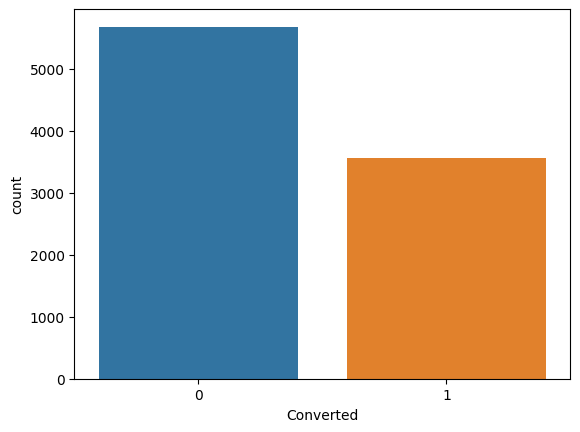

In [81]:
ejes = sns.countplot(x="Converted", data = df_train)
ejes.set_xticks([0,1])
plt.show

In [82]:
#Balace de datos al minimo, eliminando ocurrencias.

#Dividimos los dos casos
df_no_converted = df_train[df_train.Converted==0] #El potencial cliente NO ha pasa a ser cliente real
df_converted = df_train[df_train.Converted==1] #El potencial cliente SI a ser REAL

"""Se genera un conjunto de datos llamado df_nc_reducido utlizando resample de sklearn.
   1- df_no_converted es el conjunto de datos que se desea reducir
   2- n_samples el numero de muestras aleatorias que se desean obtener, es decir, dentro de los x valores de df_no_converted
   se tomaran tantas muestras como valores tiene, en este caso, df_converted. Asi ambos tendran los mismos valores
   3- Replace indica si se deben permitir o no muestras repetidas en el conujnto de datos, True indica que si
   4- Random state = 42 indica el numero de resultados que generará cada vez que se ejecute, para asegurar la aleatoriedad. 
   Al valor se le llama semilla y se puede usar cualquier numero, pero cada numero dará unos resultados distintos.
    """
df_nc_reducido = resample(df_no_converted, 
    n_samples=len(df_converted),replace=True, random_state=42)


#Se combina la clase minoritaria con la nueva clase mayoritaria la cual hemos reducido
df_train = pd.concat([df_converted, df_nc_reducido])

#Comprobacion del resultado
print(f"REAL: {len(df_train[df_train.Converted==1])}")
print(f"NO REAL: {len(df_train[df_train.Converted==0])}")

REAL: 3561
NO REAL: 3561


##Matriz de correlación

In [83]:
matriz_correlacion = df_train.corr()
print(matriz_correlacion)

                             Lead Number  Converted  TotalVisits  \
Lead Number                     1.000000   0.032599     0.016487   
Converted                       0.032599   1.000000     0.021138   
TotalVisits                     0.016487   0.021138     1.000000   
Total Time Spent on Website     0.021959   0.360618     0.215318   
Page Views Per Visit            0.057863  -0.005870     0.487952   
Asymmetrique Activity Score    -0.075779   0.175594    -0.047262   
Asymmetrique Profile Score     -0.105033   0.215196     0.116482   

                             Total Time Spent on Website  \
Lead Number                                     0.021959   
Converted                                       0.360618   
TotalVisits                                     0.215318   
Total Time Spent on Website                     1.000000   
Page Views Per Visit                            0.347770   
Asymmetrique Activity Score                    -0.056176   
Asymmetrique Profile Score         

<ipython-input-83-be50af720433>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_train.corr()


In [90]:
corr_variables = [] 
col_corr = []

for i, col_i in enumerate(matriz_correlacion.columns):
    col_corr.append(col_i)

    corr_found = False # Agregamos una variable booleana para controlar si se encontró alguna correlación para la columna actual

    for j, col_j in enumerate(matriz_correlacion.columns):
        if i != j and col_j in matriz_correlacion.columns:
            corr = matriz_correlacion.loc[col_i, col_j]

            if abs(corr) > 0.3:
                corr_found = True # Actualizamos la variable booleana para indicar que se encontró una correlación para la columna actual
                corr_variables.append((col_i, col_j, corr))

    if not corr_found:
        col_corr.remove(col_i) # Si no se encontró ninguna correlación para la columna actual, la eliminamos de la lista "col_corr"

print(corr_variables)
print(col_corr)



[('Converted', 'Total Time Spent on Website', 0.36061789266223215), ('TotalVisits', 'Page Views Per Visit', 0.48795195218855764), ('Total Time Spent on Website', 'Converted', 0.36061789266223215), ('Total Time Spent on Website', 'Page Views Per Visit', 0.3477703387611359), ('Page Views Per Visit', 'TotalVisits', 0.48795195218855764), ('Page Views Per Visit', 'Total Time Spent on Website', 0.3477703387611359)]
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [91]:
innecesario = list(set(df_train.columns).difference(col_corr))
print(innecesario)
for i in range (len(innecesario)):
  df_train = df_train.drop((innecesario[i]), axis = 1)
df_train.info()

['I agree to pay the amount through cheque', 'Prospect ID', 'City', 'Do Not Call', 'Do Not Email', 'Last Activity', 'Search', 'Newspaper', 'A free copy of Mastering The Interview', 'Lead Profile', 'Lead Origin', 'X Education Forums', 'Asymmetrique Activity Index', 'What is your current occupation', 'Update me on Supply Chain Content', 'Asymmetrique Profile Score', 'Country', 'Through Recommendations', 'Last Notable Activity', 'Specialization', 'Get updates on DM Content', 'Lead Number', 'Asymmetrique Activity Score', 'Newspaper Article', 'Receive More Updates About Our Courses', 'How did you hear about X Education', 'What matters most to you in choosing a course', 'Lead Quality', 'Magazine', 'Asymmetrique Profile Index', 'Lead Source', 'Tags', 'Digital Advertisement']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122 entries, 2 to 6691
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  

##Busqueda y sustitución de valores nulos

In [92]:
columnas_nan_porcentaje(df_train)

TotalVisits             1.670879
Page Views Per Visit    1.670879
dtype: float64


In [93]:
# Crea una instancia del modelo KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Ajusta y transforma el DataFrame
df_imputed = imputer.fit_transform(df_train)

# Convierte el resultado en un DataFrame de Pandas
df_train = pd.DataFrame(df_imputed, columns=df_train.columns)

In [94]:
columnas_nan_porcentaje(df_train)

Series([], dtype: float64)


#Division y normalización del dataset

In [95]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)
lista_entradas = list(df_train.dtypes.index)
print("Variables categoricas", categorical)
print("Variables NO categoricas", numerical)

Variables categoricas []
Variables NO categoricas ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


Al quedarnos solo con las columnas con mayor correlación, podemos observar que no hará falta realizar el onehot encoding.

##Division del dataset

In [96]:
y = df_train['Converted']
X = df_train.drop('Converted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1, stratify= df_train["Converted"])

##Normalización del dataset

In [97]:
scaler = MinMaxScaler()
scaler.fit(X_train)
fit_norm = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


display(X_train.sort_index())
display(X_test.sort_index())

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.060870,0.139814,0.145833
1,0.043478,0.454505,0.208333
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
5692,0.034783,0.152685,0.166667
5693,0.034783,0.001332,0.166667
5694,0.078261,0.098979,0.375000
5695,0.000000,0.000000,0.000000


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.086957,0.037727,0.208333
1,0.017391,0.513538,0.083333
2,0.000000,0.000000,0.000000
3,0.060870,0.549046,0.291667
4,0.000000,0.000000,0.000000
...,...,...,...
1420,0.069565,0.082557,0.333333
1421,0.026087,0.660897,0.125000
1422,0.026087,0.466933,0.125000
1423,0.000000,0.000000,0.000000


#Modelos predictivos

##Red neuronal

In [98]:
print(f"El numero de entradas a la red neuronal seran: {X_train.shape[1]}")

El numero de entradas a la red neuronal seran: 3


In [110]:
model = Sequential()
model.add(Dense(18, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Entrenamiento de la red neuronal
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Exactitud en datos de prueba: ", test_accuracy)

Epoch 1/100
161/161 [==============================] - 3s 7ms/step - loss: 0.6701 - accuracy: 0.6165 - val_loss: 0.6393 - val_accuracy: 0.7018
Epoch 2/100
161/161 [==============================] - 1s 4ms/step - loss: 0.6161 - accuracy: 0.6979 - val_loss: 0.5925 - val_accuracy: 0.7105
Epoch 3/100
161/161 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7006 - val_loss: 0.5894 - val_accuracy: 0.7088
Epoch 4/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7000 - val_loss: 0.5803 - val_accuracy: 0.7140
Epoch 5/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7020 - val_loss: 0.5759 - val_accuracy: 0.7140
Epoch 6/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.7006 - val_loss: 0.5693 - val_accuracy: 0.7140
Epoch 7/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7020 - val_loss: 0.5647 - val_accuracy: 0.7123

##Informe red neuronal

45/45 [==============================] - 0s 1ms/step
La exactitud es: 0.7108771929824561
La precision es: 0.6789536266349584
La sensibilidad es: 0.8008415147265077

    
    
    


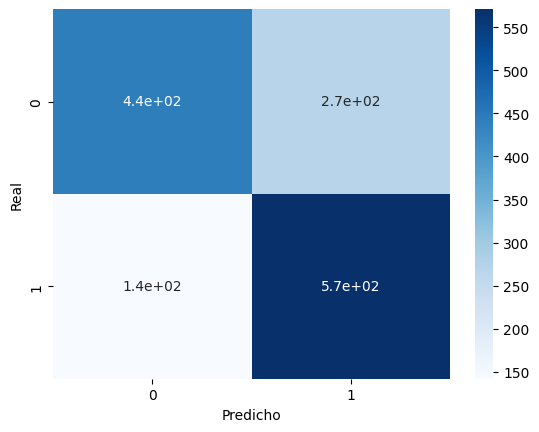

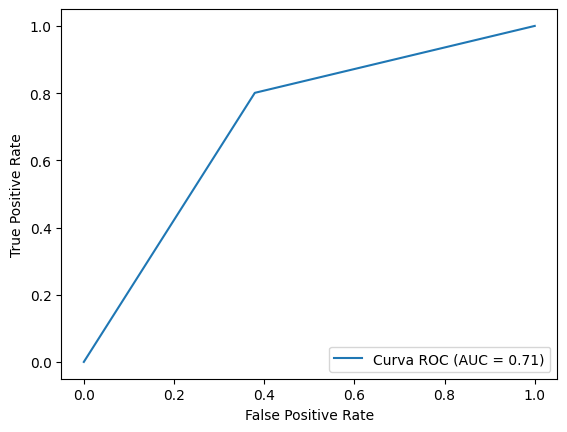

In [111]:
y_pred_binario_RN = np.round(model.predict(X_test))

informeRN = informe_modelo(y_test=y_test, y_pred=y_pred_binario_RN)

#Creacion de API y demo con gradio

In [124]:
def predict_lead_converted(total_visits, total_time_spent, page_views):
    # Normaliza las entradas utilizando el escalador
    inputs = np.array([[total_visits, total_time_spent, page_views]])
    normalized_inputs = scaler.transform(inputs)
    
    # Realiza las predicciones utilizando el modelo
    predictions = model.predict(normalized_inputs)
    
    # Devuelve los resultados de la predicción
    if (predictions[0]) > 0.55:
      return "El cliente pasará a ser real"
    else:
      return "Posiblemente nunca llegue a ser un cliente real"
    

# Define los tipos de entrada y salida
input_components = [
    gr.inputs.Slider(0.0, 251.0, step=1, label="Total Visits"),
    gr.inputs.Slider(0.0, 2272.0, step=1, label="Total Time Spent on Website"),
    gr.inputs.Slider(0.0, 55.0, step=1, label="Page Views Per Visit")
]

output_component = gr.outputs.Label(label="¿Posible cliente?")

# Crea la interfaz de Gradio
interface = gr.Interface(fn=predict_lead_converted, inputs=input_components, outputs=output_component)
interface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>